## Recommendation Model
    Item based recommendation
    User based recommendation
    Collabrative filtering

## Item based Recommendation Project
    
    We will find similar movies by using movies attributes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
ratings = pd.read_csv('ml-100k/u.data', sep='\t', header=None, names=['user_id','movie_id','ratings'],usecols=[0,1,2])

In [7]:
ratings.head()

,user_id,movie_id,ratings
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [9]:
ratings.user_id.unique().size

943

In [10]:
ratings.movie_id.unique().size

1682

In [12]:
ratings.ratings.mean() # average of movie ratings

3.52986

In [36]:
cols = "movie id | movie title | release date | video release date | IMDb URL | \
unknown | Action | Adventure | Animation | Children's | Comedy | Crime | \
Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | \
Romance | Sci-Fi | Thriller | War | Western"
cols = cols.split(' | ')

In [88]:
movie_title = pd.read_csv('ml-100k/u.item', sep='|',
                         encoding='latin', header=None,
                         names=['movie id', 'movie title'],
                         usecols=[0, 1],
                         index_col='movie id')
movie_title.head()

,movie title
movie id,
1,Toy Story (1995)
2,GoldenEye (1995)
3,Four Rooms (1995)
4,Get Shorty (1995)
5,Copycat (1995)


In [50]:
movies = pd.read_csv('ml-100k/u.item', sep='|',encoding='latin', header=None, names=cols, index_col='movie id')
movies.drop(['movie title','release date','video release date','IMDb URL','unknown'], axis=1, inplace=True)

In [49]:
movies.unknown.value_counts()

0    1680
1       2
Name: unknown, dtype: int64

In [48]:
movies.head()

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie id,,,,,,,,,,,,,,,,,,,
1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


<AxesSubplot:>

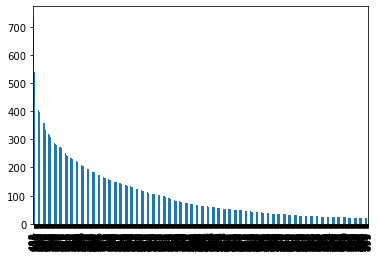

In [56]:
ratings.user_id.value_counts().plot(kind='bar')

In [57]:
ratings.head()

,user_id,movie_id,ratings
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [60]:
movie_rating = ratings.groupby('movie_id').agg({'ratings':'mean','user_id':'count'})


In [66]:
movie_rating.rename({'ratings': 'avg_rating','user_id': 'count'}, axis=1, inplace=True)

In [62]:
movie_rating.head()

,ratings,user_id
movie_id,,
1,3.878319,452
2,3.206107,131
3,3.033333,90
4,3.550239,209
5,3.302326,86


In [63]:
movie_rating.tail()

,ratings,user_id
movie_id,,
1678,1.0,1
1679,3.0,1
1680,2.0,1
1681,3.0,1
1682,3.0,1


In [65]:
movie_rating.groupby('user_id').count()

,ratings
user_id,
1,141
2,68
3,60
4,64
5,51
...,...
485,1
507,1
508,1


### Popularity Score

$$ \text  {Min Max Scaling} = \frac {X_i - min(X)} {max(X) -  min(X)} $$

In [68]:
x = [ 40, 60, 30, 10, 90, 100]
y = [ round((xi - min(x)) / (max(x) - min(x)), 2) for xi in x]
print(x)
print(y)

[40, 60, 30, 10, 90, 100]
[0.33, 0.56, 0.22, 0.0, 0.89, 1.0]


In [69]:
movie_rating['count'].max()

583

In [70]:
movie_rating['count'].min()

1

In [71]:
movie_rating['count'].mean()

59.45303210463734

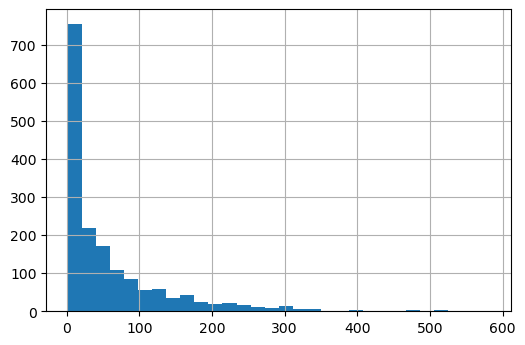

In [74]:
plt.figure(dpi=100)
movie_rating['count'].hist(bins=30)
plt.show()

In [72]:
movie_rating.quantile(q=[0.25,0.5,0.75])

,avg_rating,count
0.25,2.659600,6.0
0.50,3.161528,27.0
0.75,3.653428,80.0


### Normalise Count column

In [75]:
mi = movie_rating['count'].min()
ma = movie_rating['count'].max()

movie_rating['popularity'] = movie_rating['count'].apply(lambda v: round((v-mi)/(ma-mi),2))

In [77]:
movie_rating.drop('count', axis=1, inplace=True)

In [78]:
movie_rating.head()

,avg_rating,popularity
movie_id,,
1,3.878319,0.77
2,3.206107,0.22
3,3.033333,0.15
4,3.550239,0.36
5,3.302326,0.15


In [79]:
movies.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie id,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [80]:
movies.isna().sum()

Action         0
Adventure      0
Animation      0
Children's     0
Comedy         0
Crime          0
Documentary    0
Drama          0
Fantasy        0
Film-Noir      0
Horror         0
Musical        0
Mystery        0
Romance        0
Sci-Fi         0
Thriller       0
War            0
Western        0
dtype: int64

In [81]:
movie_rating.isna().sum()

avg_rating    0
popularity    0
dtype: int64

In [82]:
 x = pd.merge(movies, movie_rating, left_index= True, right_index=True)

In [84]:
x.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,avg_rating,popularity
movie id,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3.878319,0.77
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3.206107,0.22
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3.033333,0.15
4,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,3.550239,0.36
5,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,3.302326,0.15


In [85]:
movie_rating.loc[45]

avg_rating    4.05
popularity    0.14
Name: 45, dtype: float64

In [86]:
x.loc[45][['avg_rating', 'popularity']]

avg_rating    4.05
popularity    0.14
Name: 45, dtype: float64

In [87]:
x.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,avg_rating,popularity
movie id,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,3.878319,0.77
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3.206107,0.22
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3.033333,0.15
4,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,3.550239,0.36
5,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,3.302326,0.15


## 50 popular movies

In [93]:
ix_50 = movie_rating.sort_values('popularity', ascending=False)[:50].index
movie_title.loc[ix_50].head(10)

,movie title
movie_id,
50,Star Wars (1977)
100,Fargo (1996)
181,Return of the Jedi (1983)
258,Contact (1997)
294,Liar Liar (1997)
286,"English Patient, The (1996)"
288,Scream (1996)
1,Toy Story (1995)
300,Air Force One (1997)


In [97]:
movie_rating.loc[50]

avg_rating    4.358491
popularity    1.000000
Name: 50, dtype: float64

In [98]:
star_wars = x.iloc[50]

In [99]:
star_wars

Action         0.00000
Adventure      0.00000
Animation      0.00000
Children's     0.00000
Comedy         0.00000
Crime          0.00000
Documentary    0.00000
Drama          1.00000
Fantasy        0.00000
Film-Noir      0.00000
Horror         0.00000
Musical        0.00000
Mystery        0.00000
Romance        1.00000
Sci-Fi         0.00000
Thriller       0.00000
War            1.00000
Western        1.00000
avg_rating     3.45679
popularity     0.14000
Name: 51, dtype: float64

In [107]:
v1 = np.array([ 0, 1, 0, 1, 0])
v2 = np.array([ 1, 0, 1, 0, 1])

In [103]:
(v1*v2).sum() / ((v1**2).sum()*(v2**2).sum())

0.16666666666666666

In [111]:
from scipy.spatial.distance import cosine, euclidean

In [112]:
v1 = np.array([3.2, 0.5,])
v2 = np.array([3.2, 0.5,])

euclidean(v1, v2)

0.0

In [113]:
v1 = np.array([ 0, 1, 0, 1, 0])
v2 = np.array([ 1, 0, 1, 0, 1])
print(euclidean(v1,v2))
cosine(v1, v2)

2.23606797749979


1.0

In [114]:
v1 = np.array([ 0, 1, 0, 1, 0])
v2 = np.array([ 0, 1, 0, 1, 0])
print(euclidean(v1,v2))
cosine(v1, v2)

0.0


0.0

In [120]:
def distance(v1, v2):
    return euclidean(v1, v2)

In [128]:
def similarMovies(mid, k=5):
    x_new = x.loc[mid].values
    result = []
    for ix, each_movie in zip(x.index, x.values):
        d = distance(x_new, each_movie)
        result.append((d,ix))
    result.sort()
    
    movie_ids = [ ix for d, ix in result[:k] ]
    return movie_title.loc[movie_ids]
        

In [129]:
similarMovies(51, k=10)

AttributeError: 'numpy.ndarray' object has no attribute 'values'